In [1]:
import pandas as pd # Library for importing the data
import seaborn as sns # Library for visualising the data
import matplotlib.pyplot as plt # Library for visualising the data, works in sync with Seaborn

In [2]:
df = pd.read_csv("Login_Data.csv") # Importing the data

In [3]:
df.head() # Displaying few entries

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


In [4]:
tmp_df = df.copy() # Creating a copy of df to avoid writing on the original df

In [5]:
print("Length of DataFrame:", '{:,}'.format(len(tmp_df))) # Number of entries

Length of DataFrame: 31,269,264


In [6]:
tmp_df.isnull().sum() # Checking the null values in each column

Login Timestamp                 0
User ID                         0
IP Address                      0
Country                         0
Region                      47409
City                         8590
Browser Name and Version        0
Device Type                  1526
Login Successful                0
dtype: int64

In [7]:
tmp_df['Device Type'].value_counts() # Checking the distribution of values in Device Type

mobile     19642650
desktop     7934515
bot         2027834
unknown      867371
tablet       795368
Name: Device Type, dtype: int64

In [8]:
tmp_df['Device Type'] = tmp_df['Device Type'].fillna(value='unknown') # Replacing the missing values with unknown

In [9]:
tmp_df.isnull().sum() # Checking the null values in each column

Login Timestamp                 0
User ID                         0
IP Address                      0
Country                         0
Region                      47409
City                         8590
Browser Name and Version        0
Device Type                     0
Login Successful                0
dtype: int64

In [10]:
tmp_df['City'].value_counts() # Checking the distribution of values in City

-                    13904552
Oslo                  2308651
Stavanger              526800
St Petersburg          516977
Bergen                 341021
                       ...   
Marcilly-sur-Eure           1
Kastornoye                  1
Tsudanuma                   1
Neudorf                     1
Chotoviny                   1
Name: City, Length: 38885, dtype: int64

In [11]:
tmp_df["City"] = tmp_df["City"].replace("-", "unknown") # Replacing all - with unknown
tmp_df['City'] = tmp_df['City'].fillna(value='unknown') # Replacing the missing values with unknown

In [12]:
tmp_df.isnull().sum() # Checking the null values in each column

Login Timestamp                 0
User ID                         0
IP Address                      0
Country                         0
Region                      47409
City                            0
Browser Name and Version        0
Device Type                     0
Login Successful                0
dtype: int64

In [13]:
tmp_df['Region'].value_counts() # Checking the distribution of values in Region

-                         14013381
Oslo County                2314071
Viken                      1994024
Rogaland                   1713780
Innlandet                   834122
                            ...   
Distrikt Commewijne              1
Berane                           1
Jaunpils                         1
Fakaofo                          1
Parish of Saint Philip           1
Name: Region, Length: 2638, dtype: int64

In [14]:
tmp_df["Region"] = tmp_df["Region"].replace("-", "unknown") # Replacing all - with unknown
tmp_df['Region'] = tmp_df['Region'].fillna(value='unknown') # Replacing the missing values with unknown

In [15]:
tmp_df.isnull().sum() # Checking the null values in each column

Login Timestamp             0
User ID                     0
IP Address                  0
Country                     0
Region                      0
City                        0
Browser Name and Version    0
Device Type                 0
Login Successful            0
dtype: int64

In [16]:
print("User ID Contains Negative Values: " + str((tmp_df["User ID"] < 0).any())) # Checking if negative User ID exists
print("User ID Contains Positive Values: " + str((tmp_df["User ID"] > 0).any())) # Checking if positive User ID exists

User ID Contains Negative Values: True
User ID Contains Positive Values: True


In [17]:
print(df.dtypes) # Displaying the column names and their datatypes

Login Timestamp             object
User ID                      int64
IP Address                  object
Country                     object
Region                      object
City                        object
Browser Name and Version    object
Device Type                 object
Login Successful              bool
dtype: object


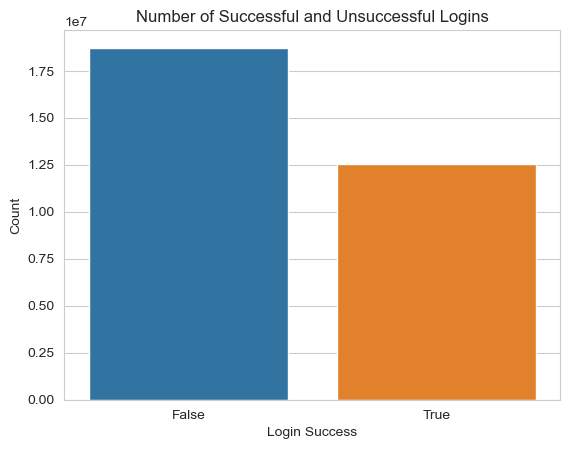

In [18]:
# Visualizing the number of successful and unsuccessful logins

# Create a countplot using seaborn
sns.set_style("whitegrid")
sns.countplot(x="Login Successful", data=tmp_df)

# Set the title and axis labels
plt.title("Number of Successful and Unsuccessful Logins")
plt.xlabel("Login Success")
plt.ylabel("Count")

plt.show()

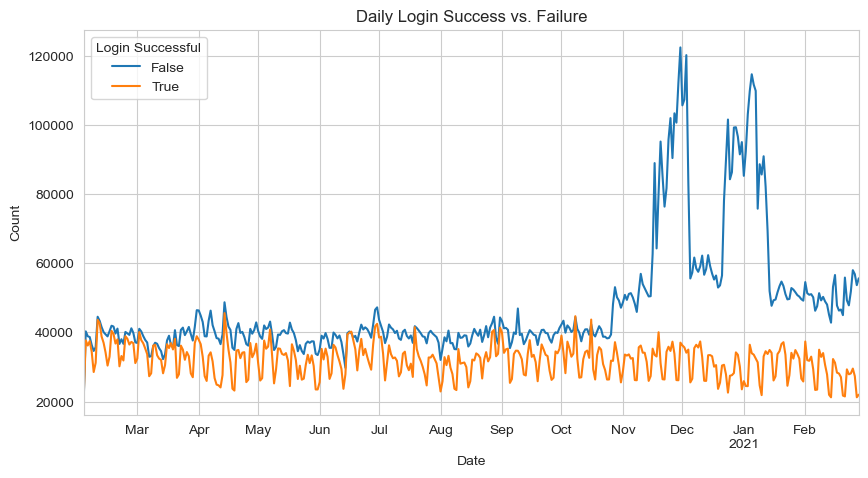

In [19]:
# Convert Login Timestamp to datetime format
tmp_df["Login Timestamp"] = pd.to_datetime(tmp_df["Login Timestamp"])

# Create a new dataframe with count of successful and failed logins per day
login_data = tmp_df.groupby([pd.Grouper(key="Login Timestamp", freq="D"), "Login Successful"]).size().reset_index(name="count")

# Pivot the dataframe to have successful and failed counts as separate columns
login_data_pivot = login_data.pivot(index="Login Timestamp", columns="Login Successful", values="count")

# Create a line plot of successful and failed logins per day
login_data_pivot.plot(kind="line", figsize=(10,5))

# Set plot title and axis labels
plt.title("Daily Login Success vs. Failure")
plt.xlabel("Date")
plt.ylabel("Count")

# Show the plot
plt.show()

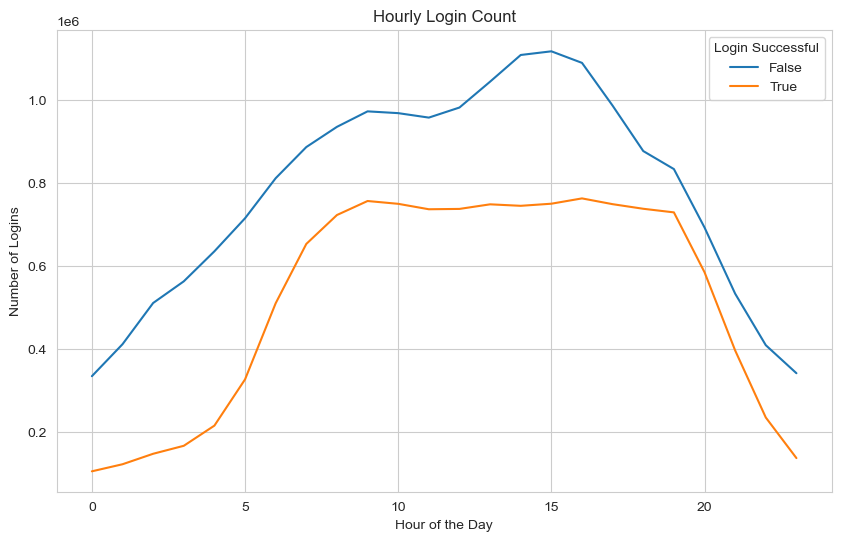

In [20]:
# Extract the hour of the day from the Login Timestamp
tmp_df['Hour'] = tmp_df['Login Timestamp'].dt.hour

# Group by hour of the day and count the number of logins
hourly_count = tmp_df.groupby(['Hour', 'Login Successful'])['User ID'].count().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='User ID', hue='Login Successful', data=hourly_count)
plt.title('Hourly Login Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.show()

In [21]:
# Displaying the top 10 users with the most Login failures
user_failures = tmp_df[tmp_df['Login Successful'] == False]['User ID'].value_counts()
top_users = user_failures.head(10).sort_values(ascending=False)
print(top_users)

-4324475583306591935    14025895
 6998943612473066845       70026
-8897190181838729192        1315
-3550173317628772375        1155
 6665318783057062876        1001
 3170364966826867167         545
-1970209372401500323         515
 1385966394387934286         446
-7198559811247368245         445
 3332350113609679787         378
Name: User ID, dtype: int64


In [22]:
# Displaying the top 10 ips with the most Login failures
ip_failures = tmp_df[tmp_df['Login Successful'] == False]['IP Address'].value_counts()
top_ips = ip_failures.head(10).sort_values(ascending=False)
print(top_ips)

10.3.205.197     444433
23.137.225.33    321325
10.3.205.196     257343
10.3.205.195     236902
10.3.205.194     178138
10.3.205.193     152262
10.3.205.192      99589
10.3.205.191      88916
10.0.181.232      77747
170.39.78.106     67563
Name: IP Address, dtype: int64


In [23]:
# Displaying the top 10 countries with the most Login failures
country_failures = tmp_df[tmp_df['Login Successful'] == False]['Country'].value_counts()
top_countries = country_failures.head(10).sort_values(ascending=False)
print(top_countries)

US    6583361
NO    4560439
RU    1689717
BR     809643
DE     788817
PL     500407
IN     323444
AU     295906
UA     281958
ID     246650
Name: Country, dtype: int64


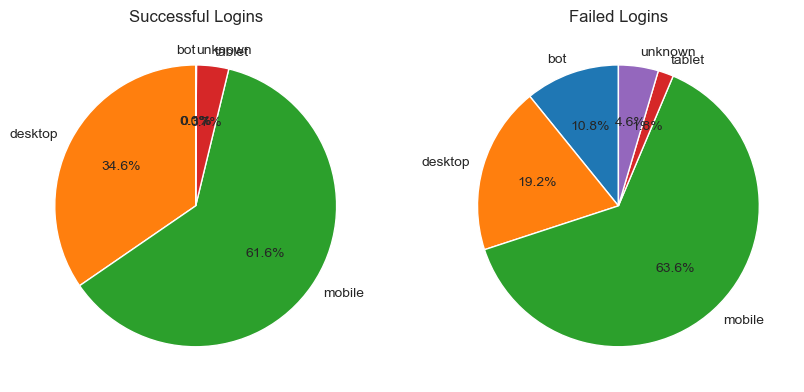

In [24]:
# Visualising Login Success Rate based on Device Type
grouped_data = df.groupby(['Login Successful', 'Device Type'])['User ID'].count()

# Get the count of each device type for successful logins
success_counts = grouped_data[True].reset_index(name='count').set_index('Device Type')['count']
# Get the count of each device type for failed logins
failure_counts = grouped_data[False].reset_index(name='count').set_index('Device Type')['count']

# Create two pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title("Successful Logins")
ax1.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Failed Logins")
ax2.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)

# Display the charts
plt.show()

In [25]:
tmp_df = tmp_df[tmp_df['User ID'] != -4324475583306591935] # 1.4cr Login failures for this user will result in skewed model

In [26]:
tmp_df.to_csv('no_null_dataframe.csv', index=False) # Saving the dataframe